## Data Analysis: EDA Report

### Instructions:  
- For the following exercise please create an EDA report and provide the requested information for each part. This exercise will include:
    - a. Which features are likely to be numerical features? 
    - b. Give the number of missing/zero values for each field.  
        - Why might the 'chol' field be all zeros?
    - c. Analyze value distributions for some selected fields.
    - d. Check for outliers and visualize with a box plot.
    - e. Analyze cardinality of categorical fields.

We will again use the UCI heart disease dataset for this exercise. However we will use a different dataset with the same schema though.

**Dataset**: Heart Disease Dataset donated to UCI ML Dataset Repository https://archive.ics.uci.edu/ml/datasets/heart+Disease. The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

### ETL

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

**NOTE:** For this lesson and exercise we will use the processed not the raw dataset provided, so the categorical feature values have already been converted to numerical values.

In [2]:
processed_basel_path = "./data/processed_swiss.csv"
processed_swiss_df = pd.read_csv(processed_basel_path).replace('?', np.nan)

In [3]:
processed_swiss_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num_label
0,32,1,1,95,0,NaN,0,127,0,.7,1,NaN,NaN,1
1,34,1,4,115,0,NaN,NaN,154,0,.2,1,NaN,NaN,1
2,35,1,4,NaN,0,NaN,0,130,1,NaN,NaN,NaN,7,3
3,36,1,4,110,0,NaN,0,125,1,1,2,NaN,6,1
4,38,0,4,105,0,NaN,0,166,0,2.8,1,NaN,NaN,2


In [4]:
processed_swiss_df.dtypes

age           int64
sex           int64
cp            int64
trestbps     object
chol          int64
fbs          object
restecg      object
thalach      object
exang        object
oldpeak      object
slope        object
ca           object
thal         object
num_label     int64
dtype: object

### A. Dataset Schema Analysis
- Based off of the schema provided what are likely to be numerical features?

**Dataset Schema**: The schema for the dataset that we will be using is on the page https://archive.ics.uci.edu/ml/datasets/heart+Disease  under the **"Attribute Information"** header. Please note that only 14 attributes are used and listed below
1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    * Value 1: upsloping
    * Value 2: flat
    * Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal:  3 = normal; 6 = fixed defect; 7 = reversable defect
14. num: diagnosis of heart disease (angiographic disease status)
    * Value 0: < 50% diameter narrowing
    * Value 1: > 50% diameter narrowing
    * Values >1: linking to attributes 59 through 68, which are vessels (we won't focus on this for this course)


### Solution
- 'age'  
- 'trestbps'
- 'chol' 
- 'thalach'
- 'oldpeak' 

### B. Missing Values
- Give the number of missing/zero values for each field
- Why might the 'chol' field be all zeros?

### Solution

In [5]:
# Missing values
def check_null_values(df):
    null_df = pd.DataFrame({'columns': df.columns, 
                            'percent_null': df.isnull().sum() * 100 / len(df), 
                           'percent_zero': df.isin([0]).sum() * 100 / len(df)
                           } )
    return null_df 

In [6]:
null_df = check_null_values(processed_swiss_df)
null_df

,columns,percent_null,percent_zero
age,age,0.000000,0.000000
sex,sex,0.000000,8.130081
cp,cp,0.000000,0.000000
trestbps,trestbps,1.626016,0.000000
chol,chol,0.000000,100.000000
fbs,fbs,60.975610,0.000000
restecg,restecg,0.813008,0.000000
thalach,thalach,0.813008,0.000000
exang,exang,0.813008,0.000000
oldpeak,oldpeak,4.878049,0.000000


**Answer:** The 'chol' field might be all zeros b/c of how this value was imputed for null values. 

### C. Value Distributions
- Analyze value distribution for the categorical feature 'cp' and the numerical feature 'oldpeak'.
- For the 'oldpeak' feature is it a normal or uniform distribution?

### Solution

**Note:** Feel free to use the Pandas dataframe value counts based function provided in the lesson.

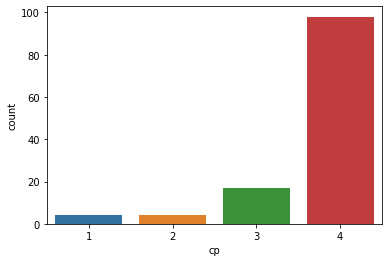

In [7]:
# this another function for histogram for value counts
sns.countplot(processed_swiss_df['cp'])


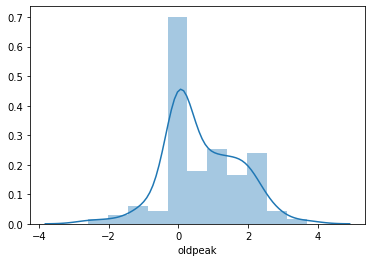

In [8]:
sns.distplot(processed_swiss_df['oldpeak'])

**Answer:** Normal distribution

### D. Outliers
- Give one feature that has outliers and visualize with box plot?

### Solution

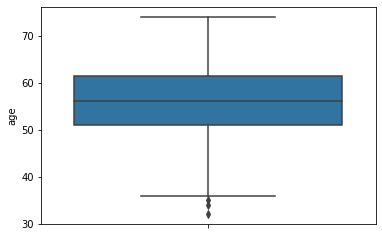

In [9]:
sns.boxplot(y=processed_swiss_df['age'])

### E. Analyzing a Dataset for High Cardinality
- Select the categorical fields and give the cardinality for each field
- Below I have added a synthetic diagnosis code field for you to the dataset.

In [10]:
def create_cardinality_feature(df):
    num_rows = len(df)
    random_code_list = np.arange(100, 1000, 1)
    return np.random.choice(random_code_list, num_rows)

new_df = processed_swiss_df.copy()
new_df['principal_diagnosis_code'] = create_cardinality_feature(new_df)

###  Solution

In [11]:
categorical_feature_list = [ 'sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal', 'principal_diagnosis_code']

In [12]:
def count_unique_values(df, cat_col_list):
    cat_df = df[cat_col_list]
    val_df = pd.DataFrame({'columns': cat_df.columns, 
                       'cardinality': cat_df.nunique() } )
    return val_df

In [13]:
val_df = count_unique_values(new_df, categorical_feature_list) 
val_df

,columns,cardinality
sex,sex,2
cp,cp,4
restecg,restecg,3
exang,exang,2
slope,slope,3
ca,ca,2
thal,thal,3
principal_diagnosis_code,principal_diagnosis_code,116


# Demographic Analysis

- Given the sex and age demographic fields, visualize the demographic breakdown by stratifying on the predictor label- 'num_label'(HINT: you can use Seaborn's catplot).
- Be sure to use the following age group boundaries -0, 18, 25, 39,  54, 65, 90 for creating age bins.
- The code below is provided for you to preprocess the dataframe.

***Preprocessing Code***

In [14]:
#analyze different age groups
processed_basel_path = "./data/processed_swiss.csv"
processed_swiss_df = pd.read_csv(processed_basel_path).replace('?', np.nan)
subset_df = processed_swiss_df[processed_swiss_df['num_label'].isin([0, 1])]
subset_df['sex'] = subset_df['sex'].replace({1:"male", 0:"female"})
subset_df['num_label'] = subset_df['num_label'].replace({1:"Positive Label: Diameter Narrowing", 0:"Negative Label: Less Diameter Narrowing"})
demo_features = ['sex',  'age', 'num_label' ]
demo_df = subset_df[demo_features]

/Users/md/opt/anaconda3/envs/test_udacity_hc_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/md/opt/anaconda3/envs/test_udacity_hc_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Solution

In [15]:
#convert age to bins
age_bins = [0, 18, 25, 39,  54, 65, 90]
a_bin = [str(x) for x in age_bins ]
age_labels = ["".join(x) for x in zip( [x + " - " for x in a_bin[:-1]], a_bin[1:])]
demo_df['age_bins'] = pd.cut(demo_df['age'], bins=age_bins, labels=age_labels)

/Users/md/opt/anaconda3/envs/test_udacity_hc_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [16]:
demo_df.head()

,sex,age,num_label,age_bins
0,male,32,Positive Label: Diameter Narrowing,25 - 39
1,male,34,Positive Label: Diameter Narrowing,25 - 39
3,male,36,Positive Label: Diameter Narrowing,25 - 39
5,female,38,Positive Label: Diameter Narrowing,25 - 39
6,male,38,Negative Label: Less Diameter Narrowing,25 - 39


### Age Bin Grouping

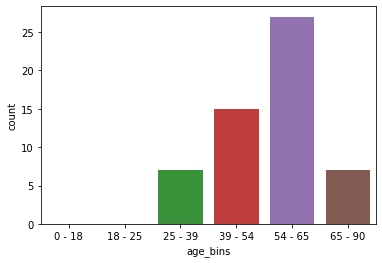

In [17]:
ax = sns.countplot(x="age_bins", data=demo_df)

### Age Bin and Gender Grouping

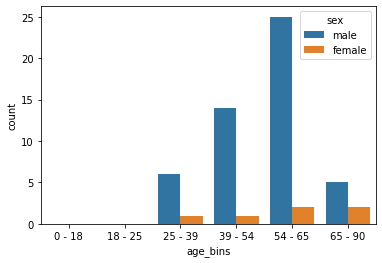

In [18]:
ax = sns.countplot(x="age_bins", hue="sex", data=demo_df)

### Age Bin and Gender Grouping Stratified by Heart Disease Condition (predictor label)

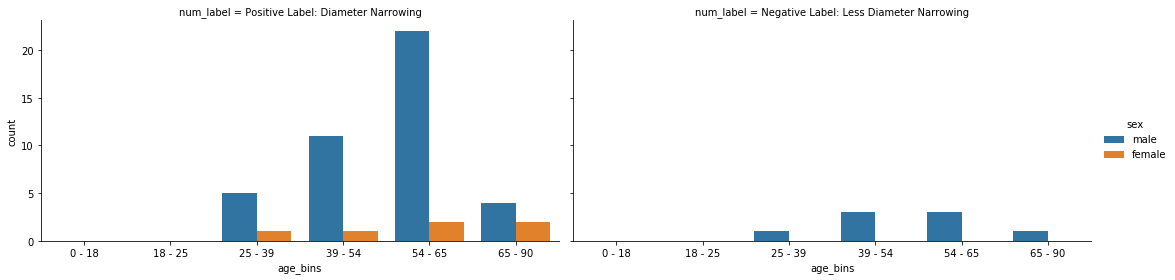

In [19]:
g = sns.catplot(x="age_bins", hue="sex", col="num_label",
                data=demo_df, kind="count",
                height=4, aspect=1.9);